Data Science Project

Car Price Prediction

https://www.kaggle.com/code/mohamedahmed10000/car-price-prediction-with-accuracy-94-4

In [48]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv("CarPrediction.csv")
df.sample(6)

,Unnamed: 0.1,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
673,692,692,Hyundai i10,Mumbai,2011,35000,Petrol,Manual,First,20.36,1197,78.90,5,2.75,Hyundai
809,831,831,Hyundai i20,Chennai,2017,12000,Diesel,Manual,First,22.54,1396,88.73,5,7.30,Hyundai
2811,2868,2868,Maruti Swift,Hyderabad,2013,69000,Diesel,Manual,First,23.40,1248,74.00,5,5.75,Maruti
3248,3312,3312,Mahindra XUV500,Mumbai,2015,82000,Diesel,Manual,First,16.00,2179,140.00,7,8.75,Mahindra
5293,5386,5386,Honda Accord,Mumbai,2008,95000,Petrol,Automatic,Third,11.70,2354,177.60,5,2.85,Honda
4463,4545,4545,Audi Q5,Coimbatore,2016,47293,Diesel,Automatic,First,14.16,1968,174.30,5,38.72,Audi


In [50]:
#Step 1: Data Cleaning and Feature Engineering
df.shape

(5912, 15)

In [51]:
type(df.columns)
df.dtypes

Unnamed: 0.1           int64
Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                  int64
Price                float64
Brand                 object
dtype: object

In [52]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5912.000000,5912.000000,5912.000000,5.912000e+03,5912.000000,5912.000000,5912.000000,5912.00000,5912.000000
mean,3012.791272,3012.791272,2013.450609,5.837766e+04,18.231778,1622.857070,113.014026,5.28180,9.584919
std,1735.810485,1735.810485,3.188638,9.189848e+04,4.431628,600.877459,53.797403,0.80269,11.233694
min,0.000000,0.000000,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.00000,0.440000
25%,1510.750000,1510.750000,2012.000000,3.351275e+04,15.260000,1198.000000,75.000000,5.00000,3.500000
50%,3013.500000,3013.500000,2014.000000,5.286250e+04,18.200000,1493.000000,94.000000,5.00000,5.700000
75%,4515.250000,4515.250000,2016.000000,7.245375e+04,21.100000,1984.000000,138.100000,5.00000,10.012500
max,6018.000000,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.00000,160.000000


In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df.drop("Unnamed: 0.1", axis=1, inplace=True)

In [55]:
null_col = ['Mileage', 'Engine' , 'Power','Seats']

imputer = SimpleImputer(strategy='most_frequent')
df[null_col] = imputer.fit_transform(df[null_col])

In [56]:
df = df.convert_dtypes()

In [57]:
missing_values_count = df.isnull().sum()
missing_values_count[0:10]

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
dtype: int64

Text(0.5, 1.0, 'BoxPlot - Price')

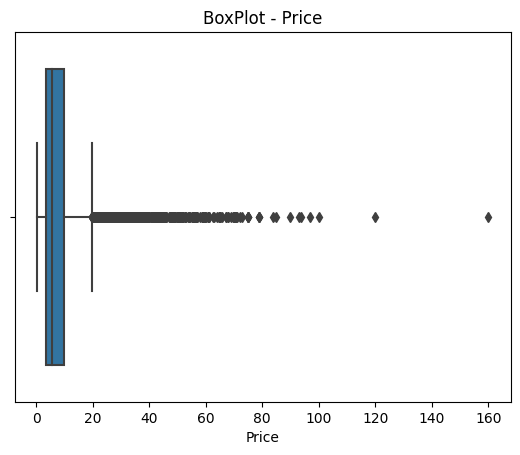

In [58]:
#Step 2: Data Understanding/Data Visualization
#-Visualization of Numerical Columns and Outliers
#-Boxplot? maybe for central tendacy?

sns.boxplot(x = df['Price']).set_title('BoxPlot - Price')

Text(0.5, 1.0, 'DistPlot - Price')

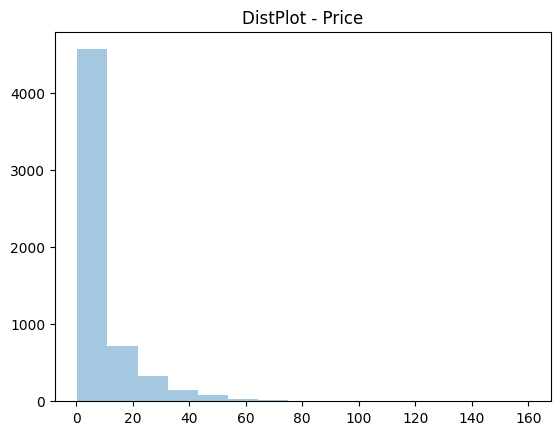

In [59]:
sns.distplot(x = df['Price'], bins=15, kde = False).set_title('DistPlot - Price')

Text(0.5, 1.0, 'BoxPlot - Seats')

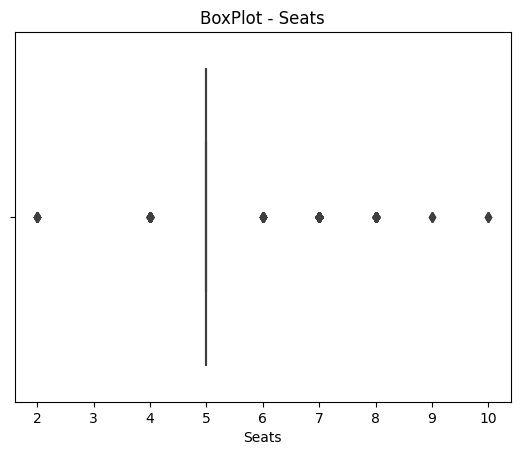

In [60]:
sns.boxplot(x = df['Seats']).set_title('BoxPlot - Seats')

Text(0.5, 1.0, 'DistPlot - Seats')

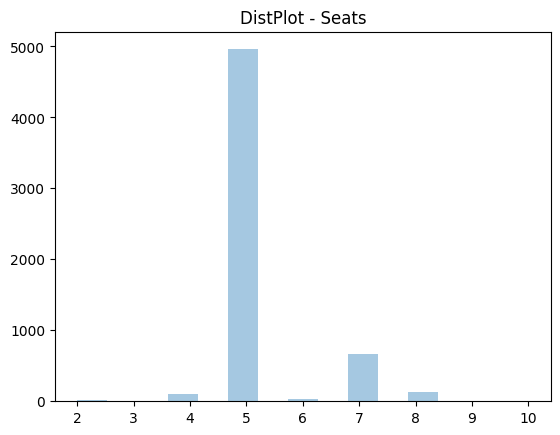

In [61]:
sns.distplot(x = df['Seats'], bins=15, kde = False).set_title('DistPlot - Seats')

Text(0.5, 1.0, 'BoxPlot - Power')

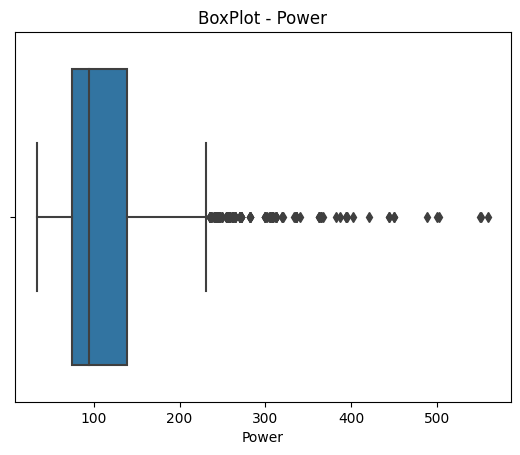

In [62]:
sns.boxplot(x = df['Power']).set_title('BoxPlot - Power')

Text(0.5, 1.0, 'DistPlot - Power')

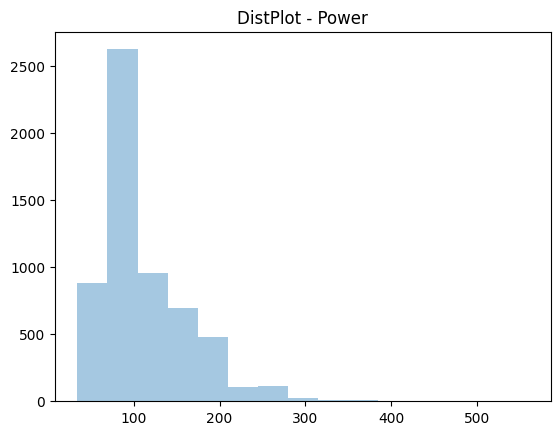

In [63]:
sns.distplot(x = df['Power'], bins=15, kde = False).set_title('DistPlot - Power')

Text(0.5, 1.0, 'BoxPlot - Engine')

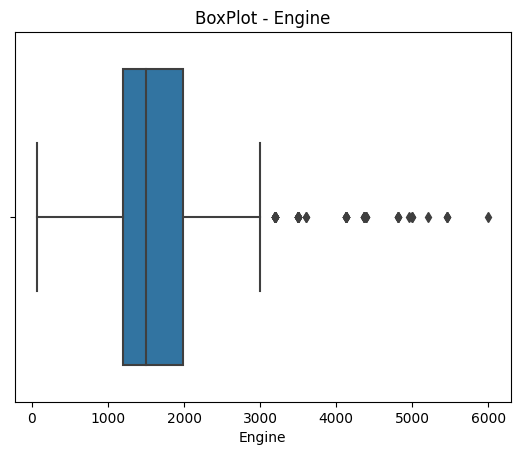

In [64]:
sns.boxplot(x = df['Engine']).set_title('BoxPlot - Engine')

Text(0.5, 1.0, 'DistPlot - Engine')

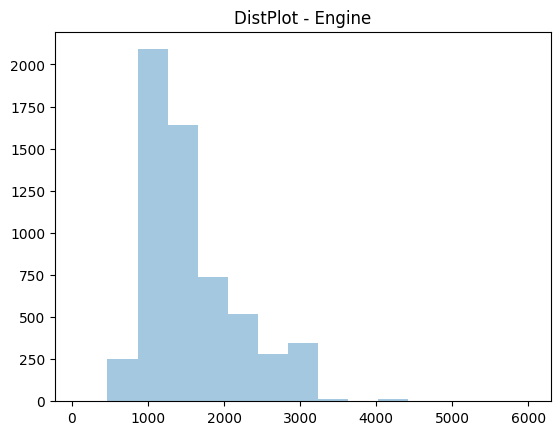

In [65]:
sns.distplot(x = df['Engine'], bins=15, kde = False).set_title('DistPlot - Engine')

Text(0.5, 1.0, 'BoxPlot - Mileage')

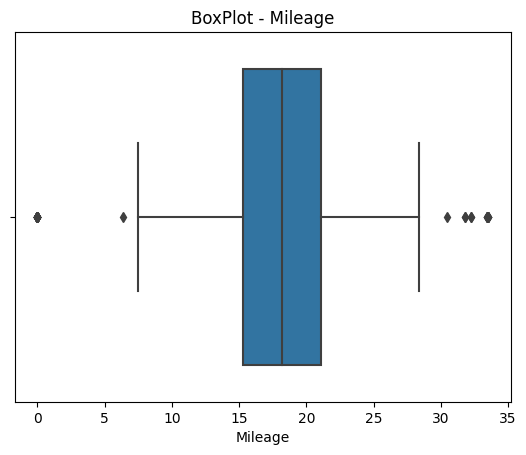

In [66]:
sns.boxplot(x = df['Mileage']).set_title('BoxPlot - Mileage')

Text(0.5, 1.0, 'DistPlot - Mileage')

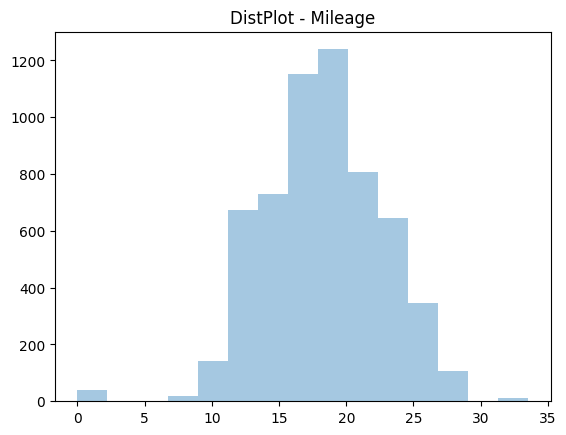

In [67]:
sns.distplot(x = df['Mileage'], bins=15, kde = False).set_title('DistPlot - Mileage')

Text(0.5, 1.0, 'BoxPlot - Kilometers_Driven')

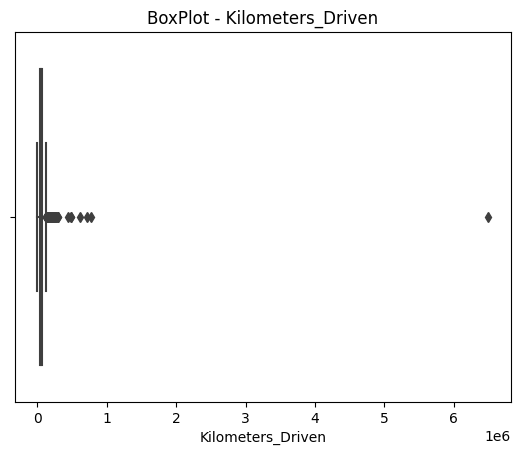

In [68]:
sns.boxplot(x = df['Kilometers_Driven']).set_title('BoxPlot - Kilometers_Driven')

Text(0.5, 1.0, 'DistPlot - Kilometers_Driven')

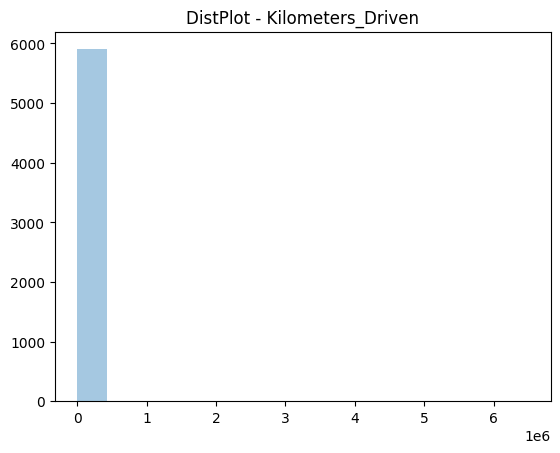

In [69]:
sns.distplot(x = df['Kilometers_Driven'], bins=15, kde = False).set_title('DistPlot - Kilometers_Driven')

Text(0.5, 1.0, 'BoxPlot - Year')

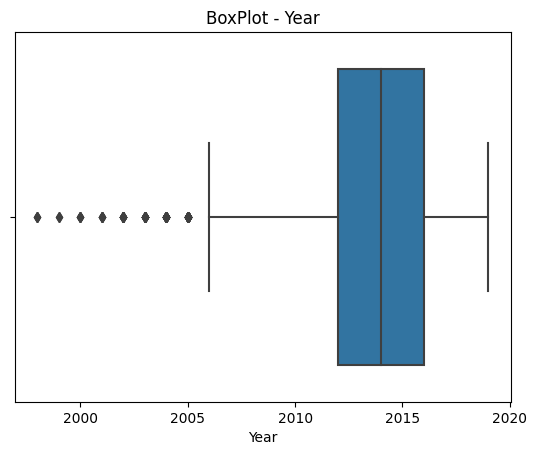

In [70]:
sns.boxplot(x = df['Year']).set_title('BoxPlot - Year')

Text(0.5, 1.0, 'DistPlot - Year')

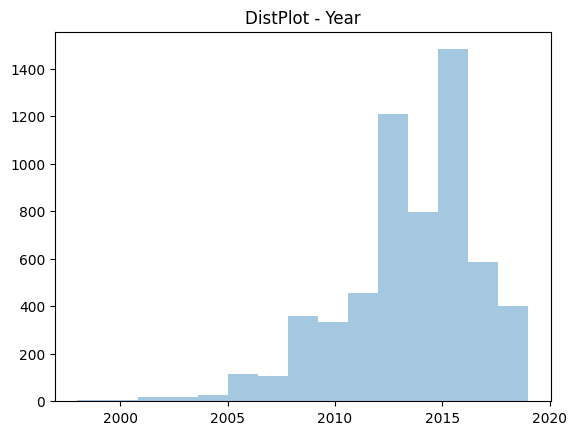

In [71]:
sns.distplot(x = df['Year'], bins=15, kde = False).set_title('DistPlot - Year')

In [72]:
#Step 3: Data Pre-Processing
#-Transformation and Spliting

In [73]:
#Step 4: Modeling
#-Linear Regression by using differnt methods to find the best accuracy

In [74]:
#Step 6: TensorFlow-- Keras?
#This part is optional but this part is for me assigned by Dr. Boukari